## Weekly trends plot for different years
* resampling frequency is 5 Days
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [2]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 5
pref = 'df_chl_dist_out_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_5D_modisa.csv


,time,id,var_lon,temp,vn,var_lat,lat,spd,ve,var_tmp,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,0.001123,NaN,5.660400,0.000393,10.800400,10.479750,-7.086450,1000.000000,...,-2.044095,0.000629,0.004915,-0.006285,0.055515,0.004401,0.034407,44,1,511.096769
260,2002-11-06,10206,0.001602,NaN,6.516450,0.000517,11.049700,9.697750,-4.161400,1000.000000,...,-2.009834,0.000903,0.006852,-0.005911,0.072977,0.006319,0.047965,45,2,537.071615
519,2002-11-11,10206,0.001463,NaN,1.003600,0.000474,11.160300,2.944400,-0.923050,1000.000000,...,-2.053374,-0.001142,-0.008708,-0.008705,-0.067304,-0.007994,-0.060957,46,3,543.918461
778,2002-11-16,10206,0.006093,NaN,-0.481700,0.001546,11.166650,3.065200,-1.909650,1000.000000,...,-1.949436,0.002811,0.020788,-0.003303,0.198612,0.019674,0.145514,46,3,550.425001
1037,2002-11-21,10206,0.001269,NaN,1.973850,0.000437,11.203850,4.811750,-0.222900,1000.000000,...,-1.949704,-0.000008,-0.000054,-0.007155,0.010720,-0.000053,-0.000375,47,4,555.915575
1296,2002-11-26,10206,0.003570,NaN,2.709950,0.000990,11.301550,5.261500,-4.312050,1000.000000,...,-1.986515,-0.001029,-0.007362,-0.008550,-0.055171,-0.007201,-0.051536,48,5,564.092422
1555,2002-12-01,10206,0.003342,NaN,5.014750,0.000973,11.424950,13.959800,-12.892850,1000.000000,...,-2.034290,-0.001280,-0.009555,-0.008894,-0.074940,-0.008959,-0.066885,48,5,601.760723
1814,2002-12-06,10206,0.010682,NaN,8.289500,0.002501,11.714650,16.154050,-13.840500,1000.000000,...,-1.950322,0.002291,0.016794,-0.004013,0.162604,0.016037,0.117555,49,6,663.793121
2073,2002-12-11,10206,0.008445,NaN,7.028100,0.002092,12.016550,13.036050,-10.971500,1000.000000,...,-1.979373,-0.000814,-0.005810,-0.008257,-0.041178,-0.005701,-0.040671,50,7,721.392727


In [3]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002



 summary statistics of chl_rate_week for the year 2002 

count    67.000000
mean      0.006843
std       0.659807
min      -3.214963
25%      -0.016729
50%       0.004810
75%       0.034862
max       4.101822
Name: chl_rate_week, dtype: float64


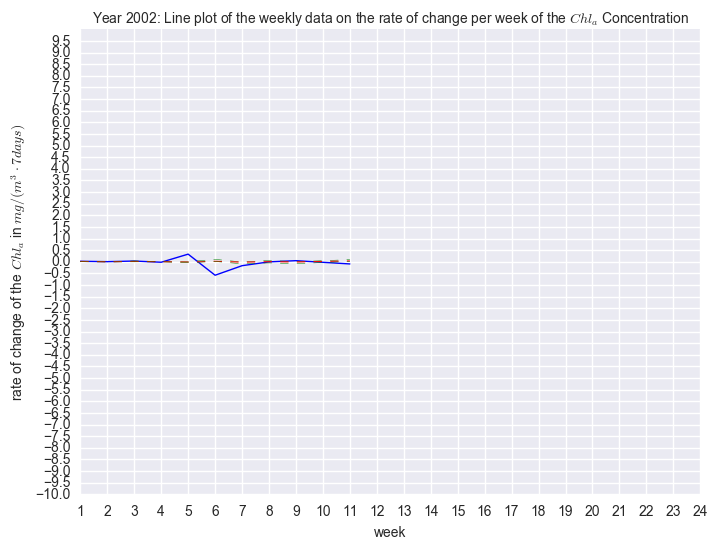

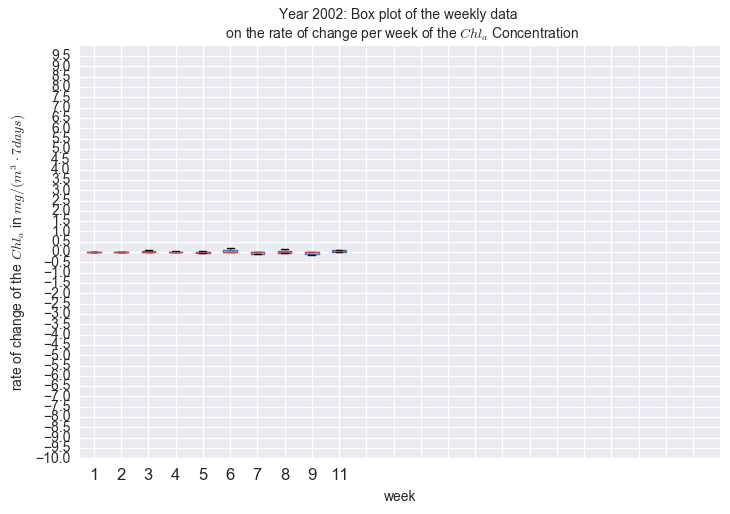


 summary statistics of chl_rate_week for the year 2003 

count    64.000000
mean     -0.031991
std       2.999249
min     -11.614872
25%      -0.121084
50%       0.001698
75%       0.066641
max      13.627500
Name: chl_rate_week, dtype: float64


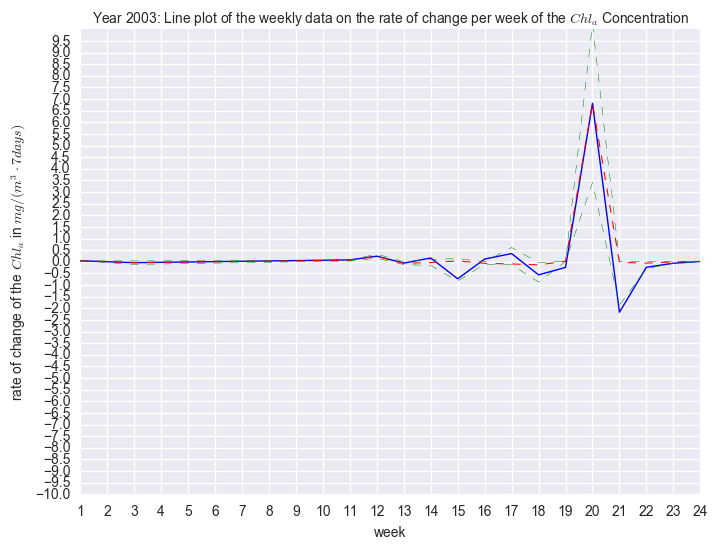

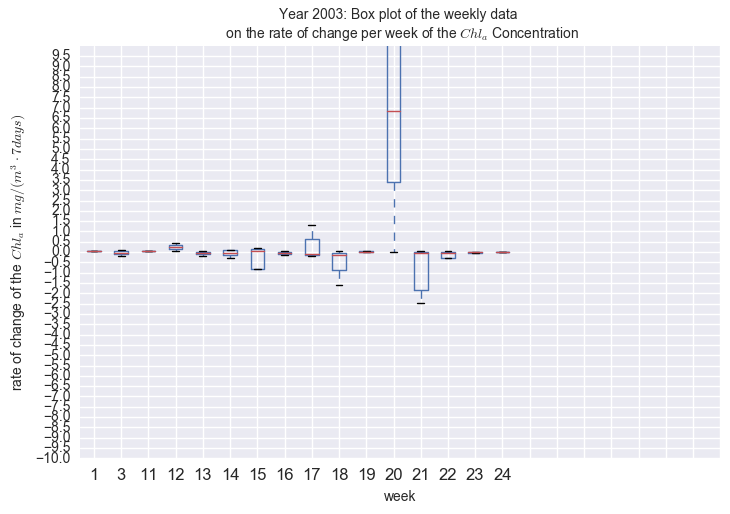


 summary statistics of chl_rate_week for the year 2004 

count    14.000000
mean      0.039923
std       0.097444
min      -0.026352
25%      -0.009491
50%       0.001884
75%       0.028059
max       0.322955
Name: chl_rate_week, dtype: float64


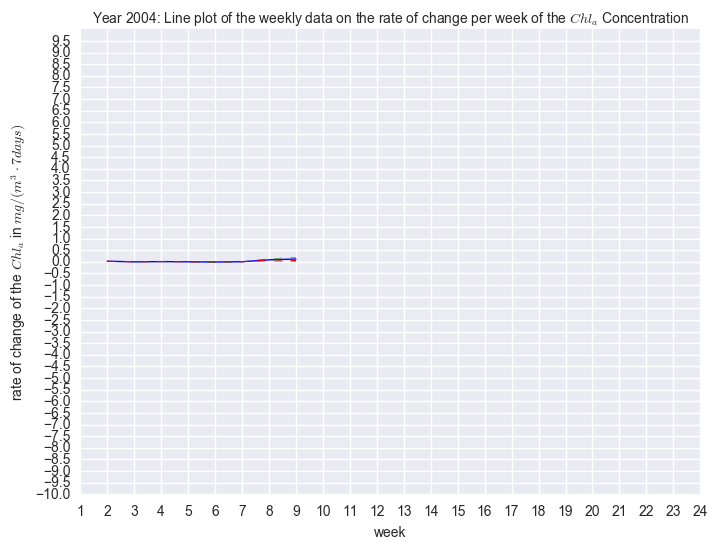

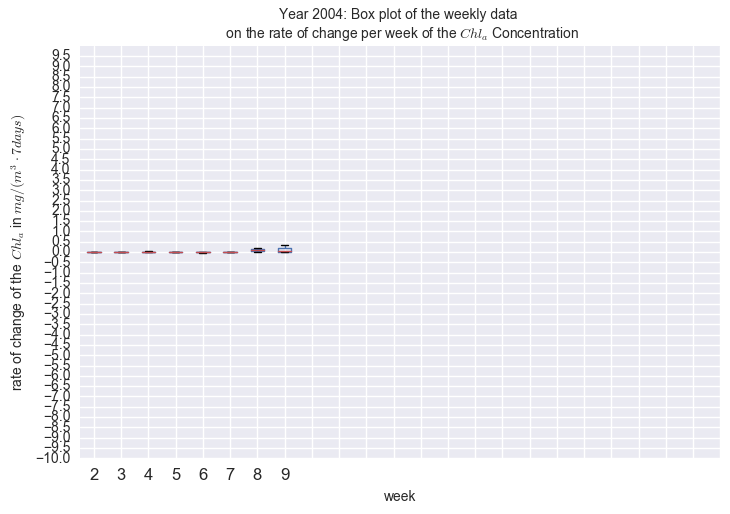


 summary statistics of chl_rate_week for the year 2005 

count    69.000000
mean      0.017466
std       0.153694
min      -0.583312
25%      -0.016694
50%       0.008378
75%       0.057810
max       0.509504
Name: chl_rate_week, dtype: float64


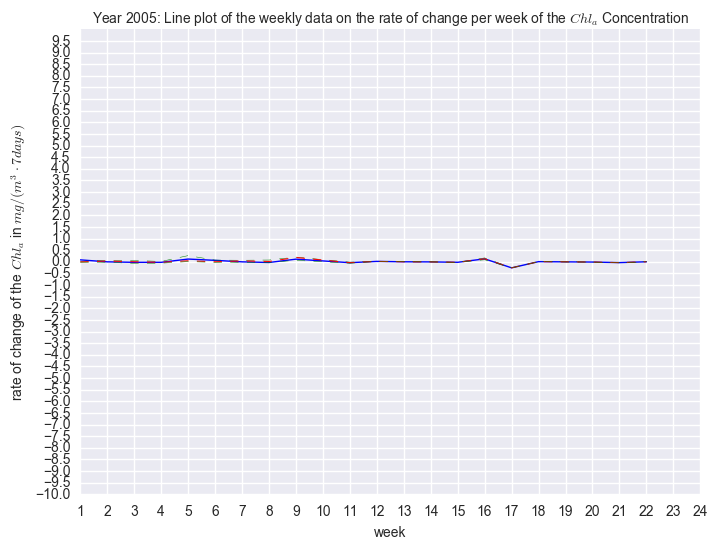

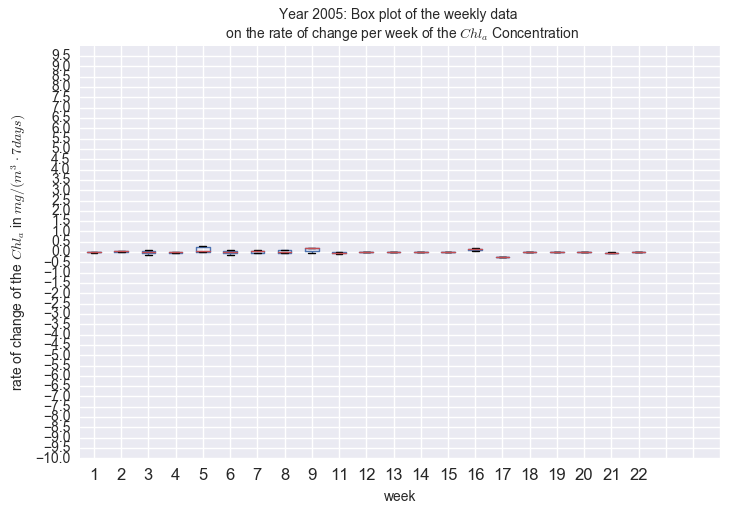


 summary statistics of chl_rate_week for the year 2006 

count    137.000000
mean      -0.000518
std        0.324761
min       -1.368745
25%       -0.053157
50%       -0.011052
75%        0.031224
max        1.657784
Name: chl_rate_week, dtype: float64


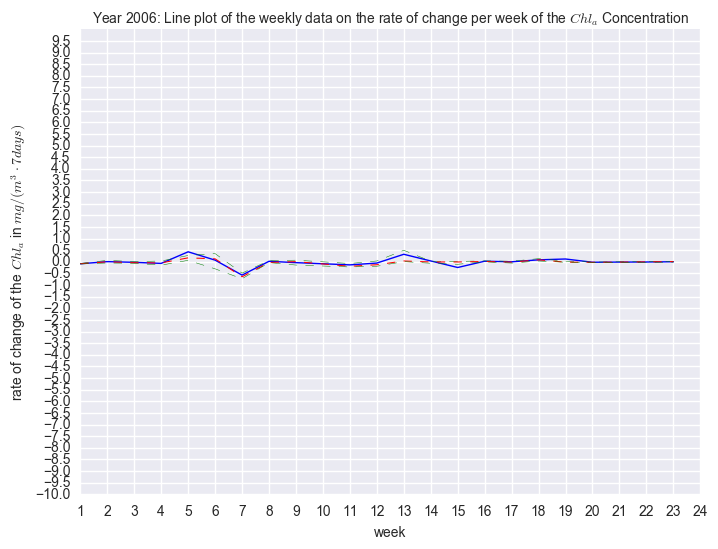

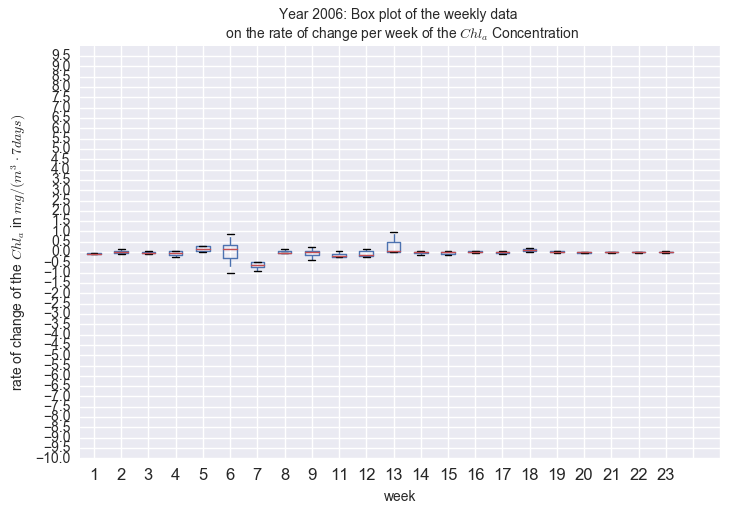


 summary statistics of chl_rate_week for the year 2007 

count    131.000000
mean       0.017076
std        0.136606
min       -0.331453
25%       -0.033464
50%        0.004049
75%        0.059442
max        0.550658
Name: chl_rate_week, dtype: float64


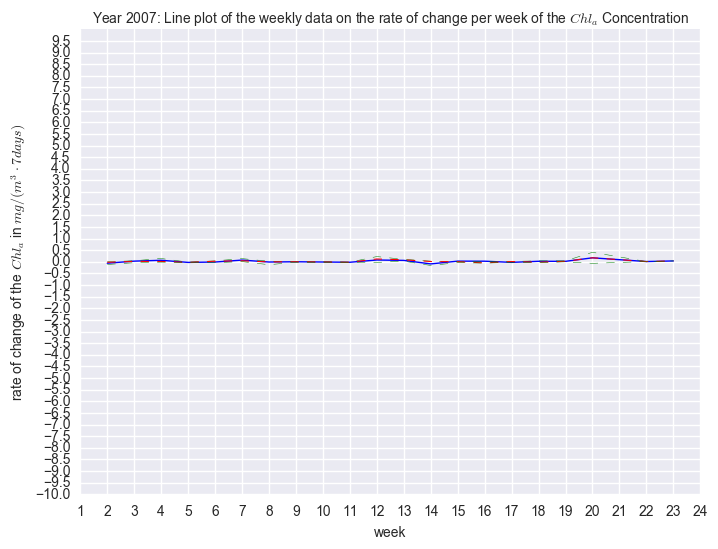

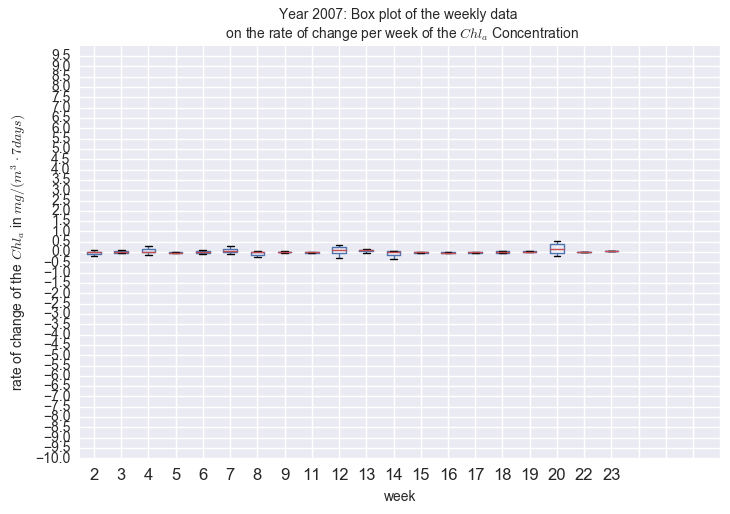


 summary statistics of chl_rate_week for the year 2008 

count    205.000000
mean      -0.289333
std        7.084446
min      -48.208768
25%       -0.076275
50%       -0.011612
75%        0.020265
max       36.394886
Name: chl_rate_week, dtype: float64


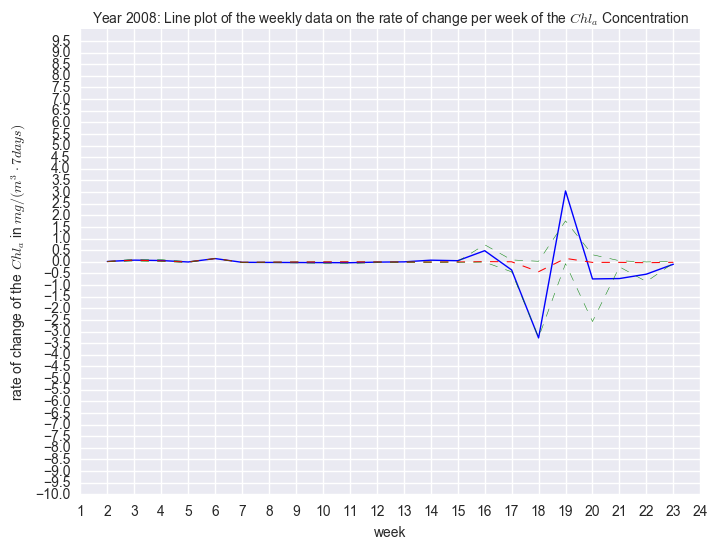

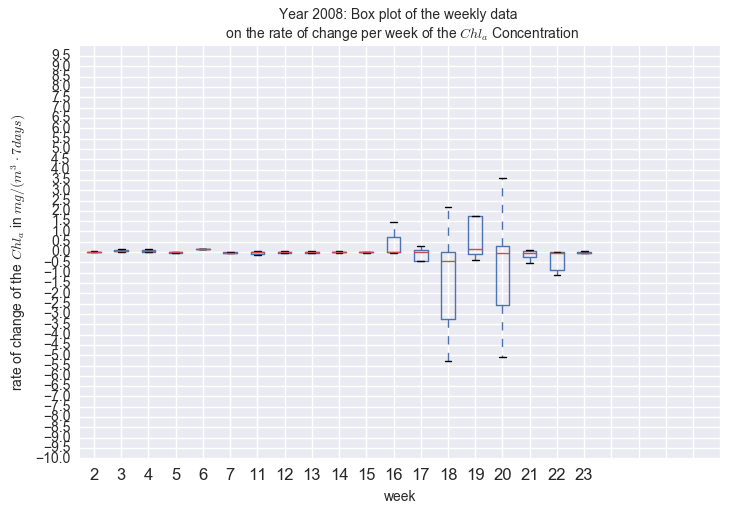


 summary statistics of chl_rate_week for the year 2009 

count    62.000000
mean      0.000597
std       2.498953
min     -14.584387
25%      -0.028941
50%      -0.000087
75%       0.033429
max      12.762309
Name: chl_rate_week, dtype: float64


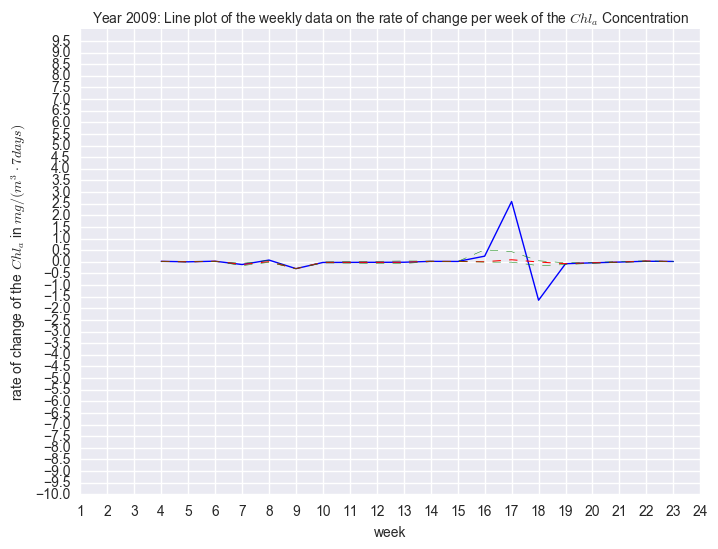

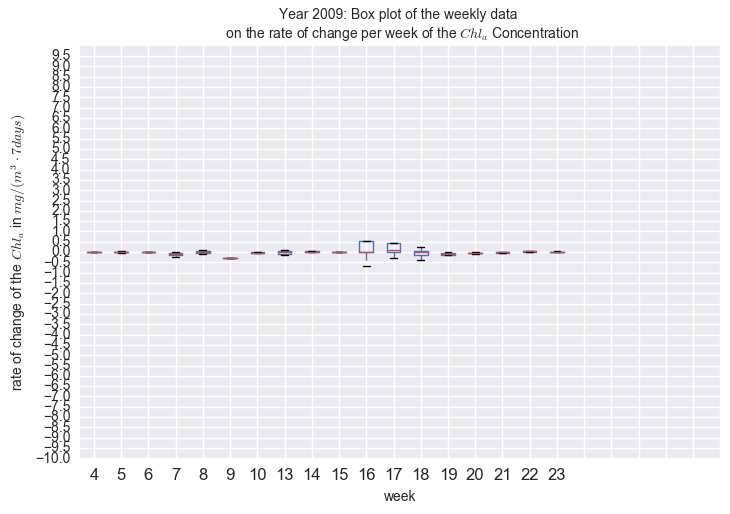


 summary statistics of chl_rate_week for the year 2010 

count    103.000000
mean      -0.018373
std        0.127273
min       -0.562812
25%       -0.039228
50%       -0.003818
75%        0.015956
max        0.431407
Name: chl_rate_week, dtype: float64


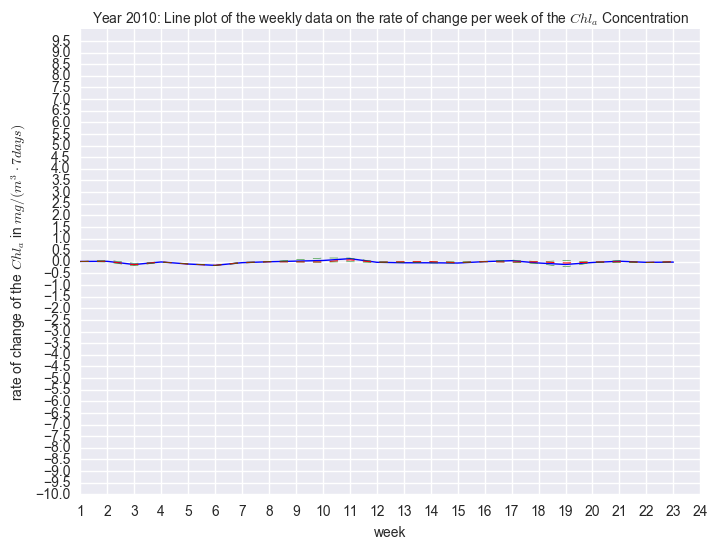

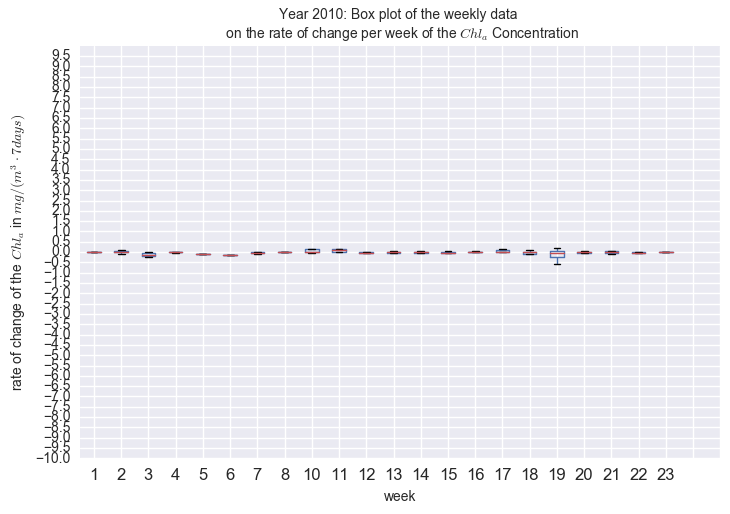


 summary statistics of chl_rate_week for the year 2011 

count    24.000000
mean      0.048518
std       0.216465
min      -0.205416
25%      -0.056066
50%       0.007180
75%       0.079339
max       0.905425
Name: chl_rate_week, dtype: float64


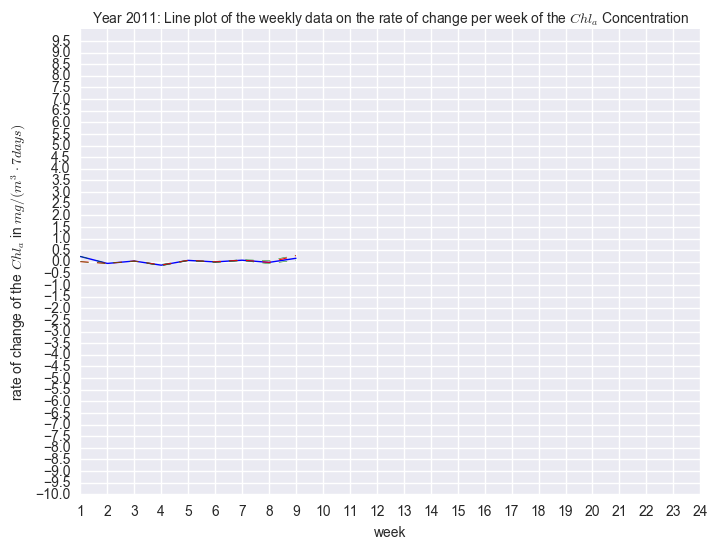

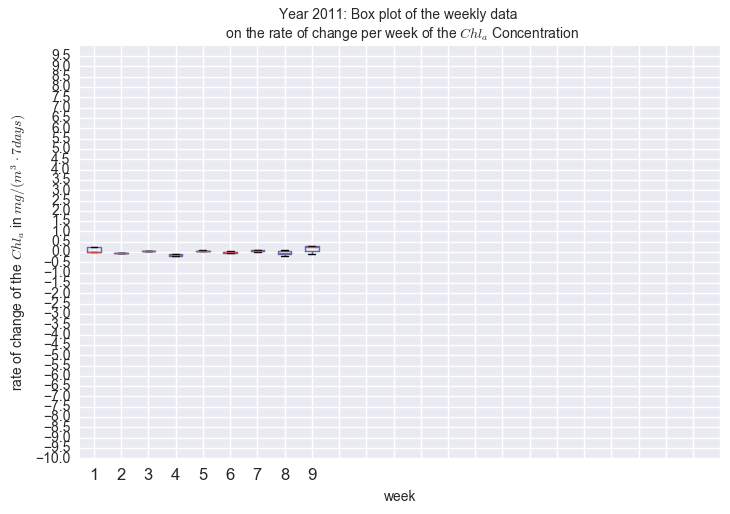


 summary statistics of chl_rate_week for the year 2012 

count    65.000000
mean      0.004723
std       4.620836
min     -21.845291
25%      -0.122916
50%       0.008197
75%       0.229638
max      22.840249
Name: chl_rate_week, dtype: float64


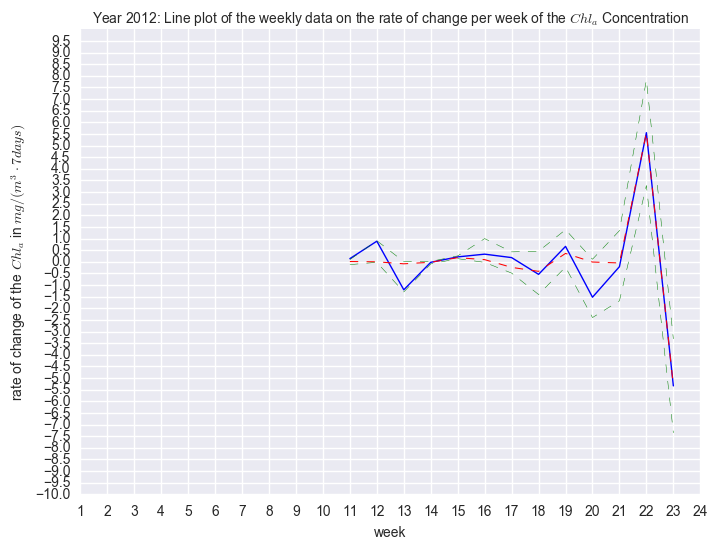

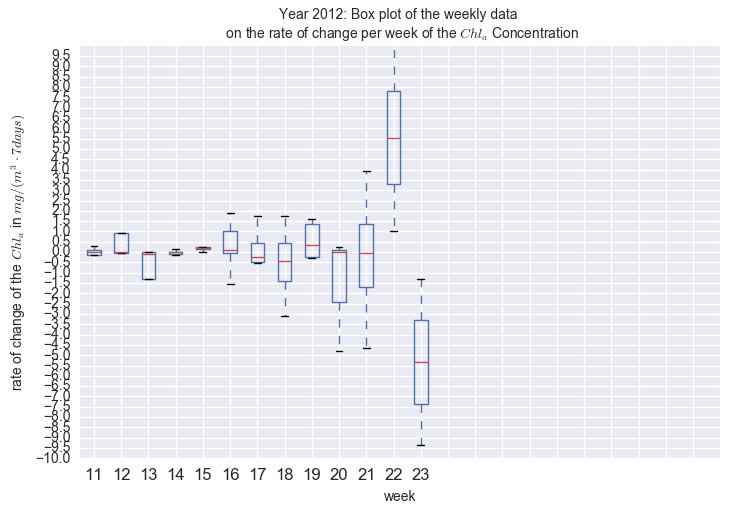


 summary statistics of chl_rate_week for the year 2013 

count    50.000000
mean     -0.000150
std       0.465589
min      -2.123040
25%      -0.128662
50%      -0.032234
75%       0.107463
max       2.021856
Name: chl_rate_week, dtype: float64


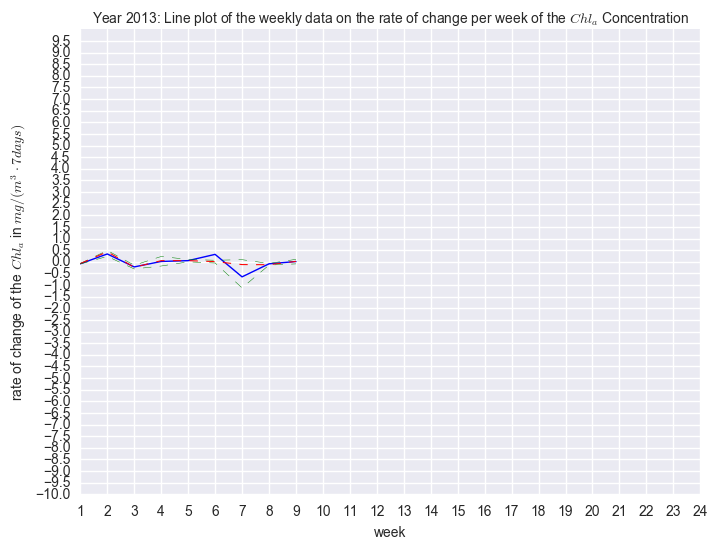

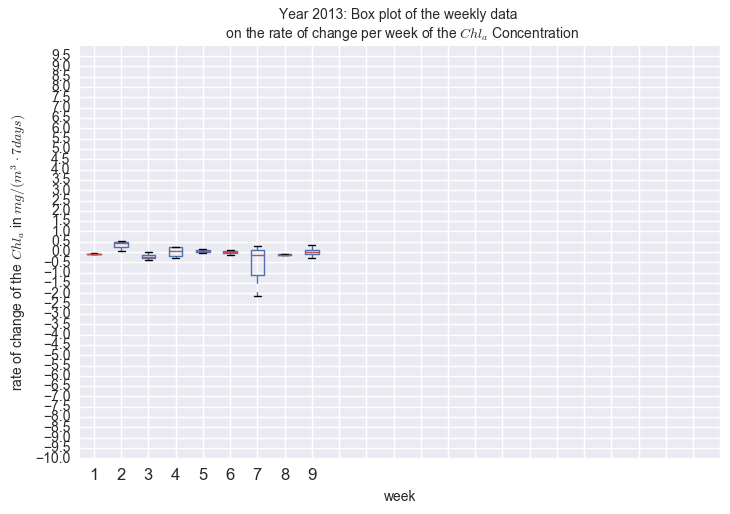


 summary statistics of chl_rate_week for the year 2014 

count    242.000000
mean       0.416411
std        6.101690
min      -18.652555
25%       -0.109199
50%        0.000072
75%        0.172268
max       81.759270
Name: chl_rate_week, dtype: float64


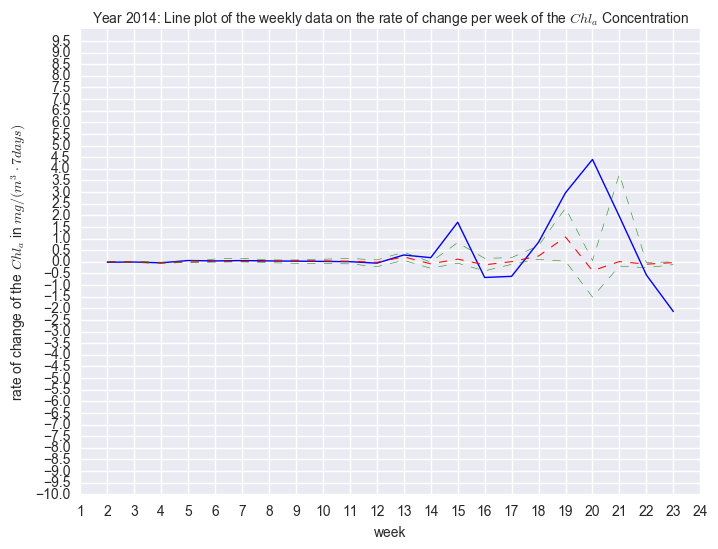

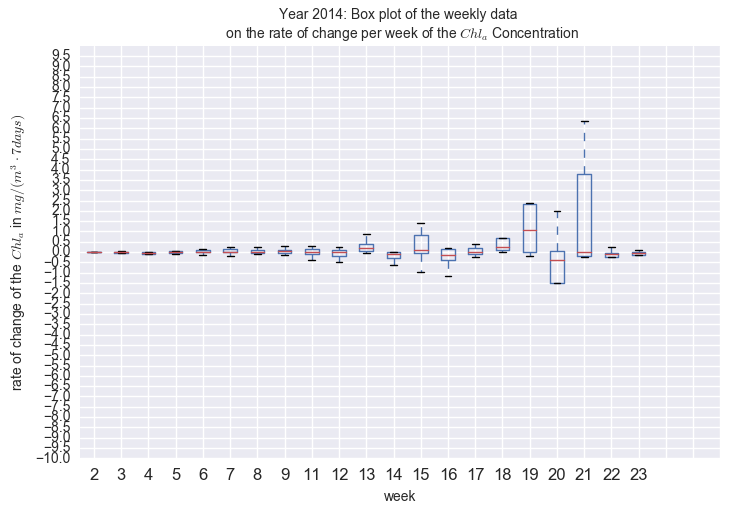


 summary statistics of chl_rate_week for the year 2015 

count    145.000000
mean       0.067298
std       10.608230
min      -83.866587
25%       -0.085876
50%        0.009987
75%        0.111764
max       89.252060
Name: chl_rate_week, dtype: float64


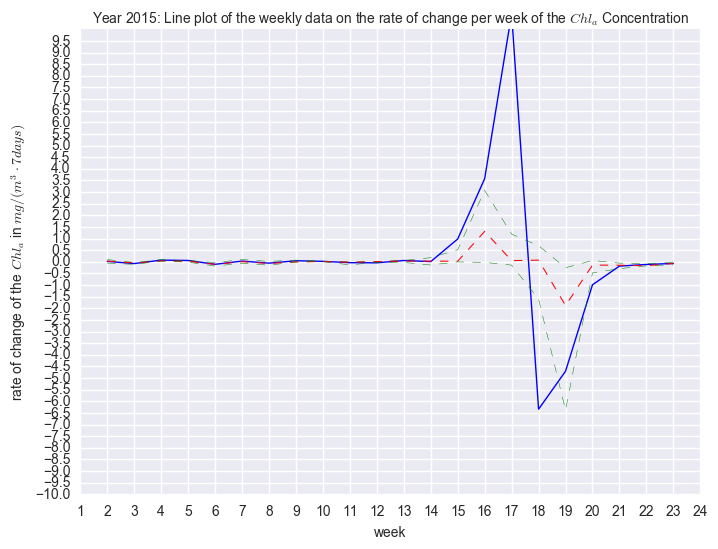

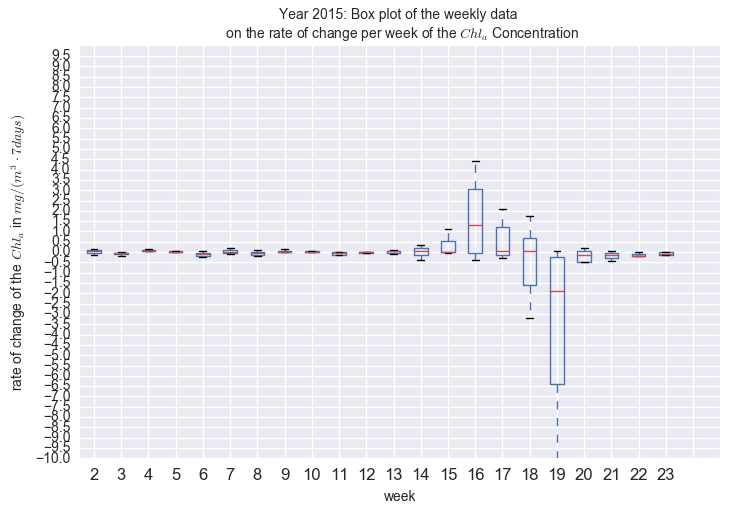


 summary statistics of chl_rate_week for the year 2016 

count    66.000000
mean     -0.004976
std       0.241006
min      -1.297767
25%      -0.022740
50%      -0.001438
75%       0.048852
max       1.176343
Name: chl_rate_week, dtype: float64


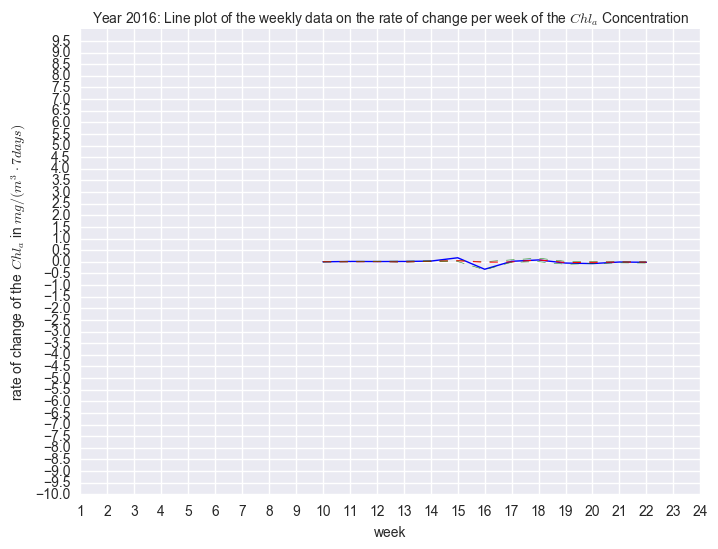

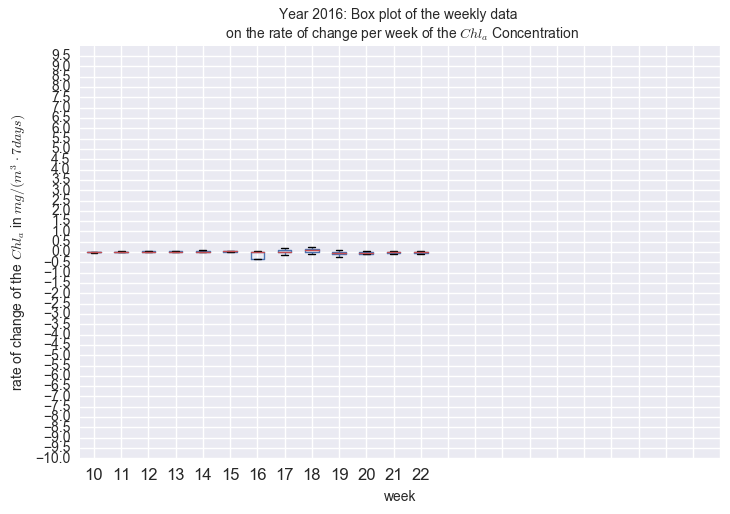

In [4]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(-10, 10)
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(-10, 10)
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()